## Please complete before submission:

**Name:** Bhuvaneshwari Ramakrishnan

**Student Number:** 2647486R

# TextAs Data Coursework

Please fill in this Google Colab by following the prompts from the coursework specification document and inserting your code in each relevant section.

- You should submit this notebook together with your report. (Two separate files)
- Specifcally you will submit **both a PDF with the report (so we can easily read it) and a .ipynb file containing the source code of your experiments as evidence**. Please do clean up your code where possible before submitting it.
- You may add whatever additional code and text blocks as needed (perhaps with [nice formatting](https://colab.research.google.com/notebooks/markdown_guide.ipynb)). Please keep the major headings (for the question numbers) the same.

As with labs, please remember to **Save a Copy to Drive** when you start working on this so that it is saved. Completing the labs provides essential knowledge for the successful completion of the coursework. 

## Downloading and loading Data

This code loads the prepared split of the Reddit data into training, validation and testing set.

In [ ]:
!wget -O reddit_data_split.zip https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
!unzip -o reddit_data_split.zip

--2022-03-21 14:15:45--  https://gla-my.sharepoint.com/:u:/g/personal/jake_lever_glasgow_ac_uk/EapVNOIV84tPnQuuFBNgG9UBYIWipQ9JL4QTfSgRtIacBw?download=1
Resolving gla-my.sharepoint.com (gla-my.sharepoint.com)... 52.105.15.53
Connecting to gla-my.sharepoint.com (gla-my.sharepoint.com)|52.105.15.53|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip [following]
--2022-03-21 14:15:45--  https://gla-my.sharepoint.com/personal/jake_lever_glasgow_ac_uk/Documents/Teaching/reddit_data_split.zip
Reusing existing connection to gla-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 468327 (457K) [application/x-zip-compressed]
Saving to: ‘reddit_data_split.zip’

reddit_data_split.z 100%[===================>] 457.35K   739KB/s    in 0.6s    

2022-03-21 14:15:46 (739 KB/s) - ‘reddit_data_split.zip’ saved [468327/468327]

Archive:  reddit_data_split.zip
  inflating: reddi

In [ ]:
import json

with open('reddit_train.json') as f:
    train_data = json.load(f)
with open('reddit_val.json') as f:
    validation_data = json.load(f)
with open('reddit_test.json') as f:
    test_data = json.load(f)

print("Number of posts in training data:", len(train_data))
print("Number of posts in validation data:", len(validation_data))
print("Number of posts in test data:", len(test_data))

Number of posts in training data: 1200
Number of posts in validation data: 400
Number of posts in test data: 400


## Q1:

### Q1a:

In [ ]:
# Converting the three data sets to data frames for easier processing and analysis
import pandas as pd
import matplotlib.pyplot as plt

training_data = pd.DataFrame(train_data).set_index('subreddit')

testing_data = pd.DataFrame(test_data).set_index('subreddit')

validating_data = pd.DataFrame(validation_data).set_index('subreddit')

training_data

,title,score,id,author,body
subreddit,,,,,
PS4,Can I get banned for having a game that I didn...,0,queqfu,XC-XERZ,"Long story short, I saw ESO in my library, dow..."
pcgaming,How to get a Kinect sensor to work with a PC?,0,1eujoa,ZachTheKing,I have seen a video online where someone took ...
NintendoSwitch,Switch Only Charges with GoPro Cable,5,m00bx7,BluePenguin2002,"Hi, hope this is the right place/way to post t..."
antiMLM,L’Occitane going down MLM route?,15,q13pvx,100fluffyclouds,After buying a majority share in Limelight/Alc...
HydroHomies,Guys i need your help,2,rxiv2g,Epicskeleton53,Is it ok for me to drink coffee in the morning...
...,...,...,...,...,...
xbox,I’m debating if I should get a PC or Xbox Seri...,2,m6a172,Matt3339,I do have some question as well.\n1. Can the S...
Coffee,Where can I buy several exotic or unique coffees?,10,3yvspn,victorlinguist,I am looking for an online place that will off...
tea,What are some of y'all's favorite non-caffeina...,5,bdlfo5,Bobthebanana73,"Due to medical reasons, I am currently not all..."


####Exploring the Data Sets

####Training Data Set:

Count of different subreddits in training data set

In [ ]:
count_training=training_data.groupby(by='subreddit')
training_size=count_training.size()

Distribution in percentage

In [ ]:
for k,v in count_training:
  print(k)
  print(100*len(v)/len(training_data))

Coffee
11.333333333333334
HydroHomies
11.166666666666666
NintendoSwitch
12.083333333333334
PS4
11.833333333333334
Soda
8.5
antiMLM
10.666666666666666
pcgaming
11.25
tea
12.166666666666666
xbox
11.0


####Validation Data Set

Count of subreddits in validation data set

In [ ]:
count_validating=validating_data.groupby(by='subreddit')
validating_size=count_validating.size()

Distribution in percentage

In [ ]:
for k,v in count_validating:
  print(k)
  print(100*len(v)/len(validating_data))

Coffee
10.5
HydroHomies
9.5
NintendoSwitch
13.0
PS4
10.75
Soda
10.75
antiMLM
13.5
pcgaming
10.75
tea
12.0
xbox
9.25


####Testing Data Set

Count of subreddits in testing data set

In [ ]:
count_testing=testing_data.groupby(by='subreddit')
testing_size=count_testing.size()

Distribution of the data

In [ ]:
for k,v in count_testing:
  print(k)
  print(100*len(v)/len(testing_data))

Coffee
14.0
HydroHomies
9.5
NintendoSwitch
13.0
PS4
12.0
Soda
7.25
antiMLM
11.0
pcgaming
11.75
tea
10.5
xbox
11.0


Graphical Representation of the distribution of reddit records in each of the data sets

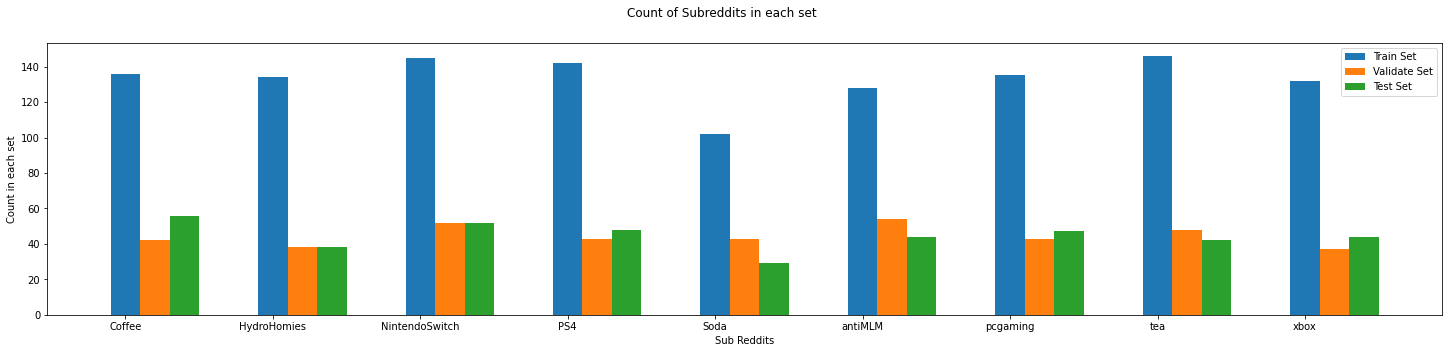

In [ ]:
#Bar graph view of the distribution of records in three data sets
x_labels=[]
for k,v in count_testing:
  x_labels.append(k)

x_axis_len = np.arange(len(testing_data.groupby(by='subreddit')))

#plotting the bar graph

plt.figure(figsize=(25,5))
plt.suptitle('Count of Subreddits in each set')
plt.xlabel('Sub Reddits')
plt.ylabel('Count in each set')
plt.bar(x_axis_len +0.0,training_size,width=0.2,label='Train Set')
plt.bar(x_axis_len +0.2,validating_size,width=0.2,label='Validate Set')
plt.bar(x_axis_len +0.4,testing_size,width=0.2,label='Test Set')
plt.xticks(x_axis_len,x_labels)
plt.legend()
plt.show()

From the above distributions it can be seen that the subreddits are shuffled across three data sets(train/val/test) in an neutral manner. All the different categories of the sub reddits have good number of records in each data set which helps to create an unbiased classifier. 

### Q1b:

Text Representation

Defining Tokeniser to be used inside Vectoriser for better optimizations using SpaCy and nltk library for stopwords

In [ ]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')

# Download a stopword list
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Tokenising function which takes in a text and returns the list of tokens
def text_pipeline_spacy(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        if not t.is_stop and not t.is_punct and not t.is_space:
            tokens.append(t.lemma_.lower())
    return tokens

Feature extraction - Vectorizers

One Hot Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#using CountVectorizer to get one hot features and using the index of the data frames to capture the labels
one_hot_vectorizer = CountVectorizer(binary=True)
onehot_train_features = one_hot_vectorizer.fit_transform(training_data['body'].tolist())
train_labels = training_data.index

onehot_validation_features = one_hot_vectorizer.transform(validating_data['body'])
validation_labels = validating_data.index

onehot_test_features = one_hot_vectorizer.transform(testing_data['body'])
test_labels = testing_data.index

print(onehot_train_features.shape)
print(onehot_validation_features.shape)
print(onehot_test_features.shape)

(1200, 8781)
(400, 8781)
(400, 8781)


TF-ID Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Using TfidfVectoriszer to calculate the Tf-IDF vectors
tfidfvector = TfidfVectorizer()

tfidf_train_features = tfidfvector.fit_transform(training_data['body'].tolist())
tfidf_validation_features = tfidfvector.transform(validating_data['body'])
tfidf_test_features = tfidfvector.transform(testing_data['body'])

print(tfidf_train_features.shape)
print(tfidf_validation_features.shape)
print(tfidf_test_features.shape)

(1200, 8781)
(400, 8781)
(400, 8781)


Classification Report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score

# Function that return ths evaluation summary of the model and its parameters
def evaluation_summary(description, true_labels, predictions, target_classes=train_labels.unique()):
  return classification_report(true_labels, predictions,  digits=3, zero_division=0, target_names=target_classes, output_dict=True)

Checking the accuracies of the 5 given classifier with Training data set

1. Dummy Classifier - most frequent

In [ ]:
from sklearn.dummy import DummyClassifier

#Using strategy = most frquent to calculate the accuracy of the Dummy Classifier
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(onehot_train_features, train_labels)
print('accuracy:',dummy_mf.score(onehot_test_features, test_labels))

dummy_mf_test_labels = dummy_mf.predict(onehot_test_features)
#Capturing the evaluation metrics for the above model
dummy_mf_eval=evaluation_summary("Dummy Most Frequent", test_labels, dummy_mf_test_labels,test_labels.unique())

accuracy: 0.105


2. Dummy Classifier - Stratified

In [ ]:
#Using strategy as Streatified for the dummy classifier
dummy_strat = DummyClassifier(strategy='stratified')
dummy_strat.fit(onehot_train_features, train_labels)
print('accuracy:' ,dummy_strat.score(onehot_test_features, test_labels))

dummy_strat_test_labels = dummy_strat.predict(onehot_test_features)
#Capturing the evaluation metrics for the above model
dummy_strat_eval=evaluation_summary("Dummy Stratified", test_labels, dummy_strat_test_labels,test_labels.unique())


accuracy: 0.0875


3. LogisticRegression with One-hot vectorization 

In [ ]:
from sklearn.linear_model import LogisticRegression

#Using Logistic Regression classfier with one hot vectors
lr = LogisticRegression()
lr_onehot_model = lr.fit(onehot_train_features, train_labels)
print('accuracy: ', lr_onehot_model.score(onehot_test_features, test_labels))

lr_oneshot_test_labels = lr_onehot_model.predict(onehot_test_features)

#Capturing the evaluation metrics for the above model
lr_oneshot_eval=evaluation_summary("Logistic Regression One-Hot", test_labels, lr_oneshot_test_labels,test_labels.unique())

accuracy:  0.68


4. LogisticRegression with TF-IDF vectorization

In [ ]:
#Using Logistic regression with TFIDF vectors
lr_tfidf_model = lr.fit(tfidf_train_features, train_labels)
print('accuracy:', lr_tfidf_model.score(tfidf_test_features, test_labels))

lr_tfidf_test_labels = lr_tfidf_model.predict(tfidf_test_features)

#Capturing the evaluation metrics for the above model
lr_tfidf_eval=evaluation_summary("Logistic Regression TF-IDF", test_labels, lr_tfidf_test_labels,test_labels.unique())

accuracy: 0.775


5. SVC Classifier with  One-hot vectorization

In [ ]:
from sklearn.svm import SVC

# Using SVC Classifier with RBF Kernel
svm = SVC(kernel='rbf')
rbf_model = svm.fit(onehot_train_features,train_labels)
print('accuracy:', rbf_model.score(onehot_test_features, test_labels))

rbf_test_labels = rbf_model.predict(onehot_test_features)

#Capturing the evaluation metrics for the above model
rbf_eval=evaluation_summary("SVM RBF", test_labels, rbf_test_labels,test_labels.unique())

accuracy: 0.645


Accuracy, Macro avg, weighted avg for Precision, recall and f1 scores for all classifiers

In [ ]:
#Collecting the dictionary of all the classification reports and converting them to Data frames

dummy_mf_df=pd.DataFrame.from_dict(dummy_mf_eval)[['accuracy','macro avg','weighted avg']][:-1]
dummy_strat_df = pd.DataFrame.from_dict(dummy_strat_eval)[['accuracy','macro avg','weighted avg']][:-1]
lr_onehot_df = pd.DataFrame.from_dict(lr_oneshot_eval)[['accuracy','macro avg','weighted avg']][:-1]
lr_tfidf_df = pd.DataFrame.from_dict(lr_tfidf_eval)[['accuracy','macro avg','weighted avg']][:-1]
rbf_df = pd.DataFrame.from_dict(rbf_eval)[['accuracy','macro avg','weighted avg']][:-1]

#Combining the individual dataframes to form a single dataframe
all_frames=[dummy_mf_df,dummy_strat_df,lr_onehot_df,lr_tfidf_df,rbf_df]
all_classifier_df=pd.concat(all_frames,keys=['Dummy_MF','Dummy_Strat','LR_OneHot','LR_TFIDF','RBF_SVM'])
all_classifier_df

accuracy  macro avg  weighted avg
Dummy_MF    precision     0.105   0.011667      0.011025
            recall        0.105   0.111111      0.105000
            f1-score      0.105   0.021116      0.019955
Dummy_Strat precision     0.120   0.117860      0.121737
            recall        0.120   0.117828      0.120000
            f1-score      0.120   0.117178      0.120124
LR_OneHot   precision     0.680   0.683160      0.681440
            recall        0.680   0.686482      0.680000
            f1-score      0.680   0.681948      0.677914
LR_TFIDF    precision     0.775   0.786903      0.783215
            recall        0.775   0.778377      0.775000
            f1-score      0.775   0.779433      0.775973
RBF_SVM     precision     0.645   0.669089      0.666733
            recall        0.645   0.650284      0.645000
            f1-score      0.645   0.647955      0.643614

From the above representation it can be seen that LR_TFIDF (Logistic regression using TF-IDF) has the highest F1-weighted avg score among all classifiers.

F1 Scores for all SubReddits in Logistic regression using TF-IDF

<BarContainer object of 9 artists>

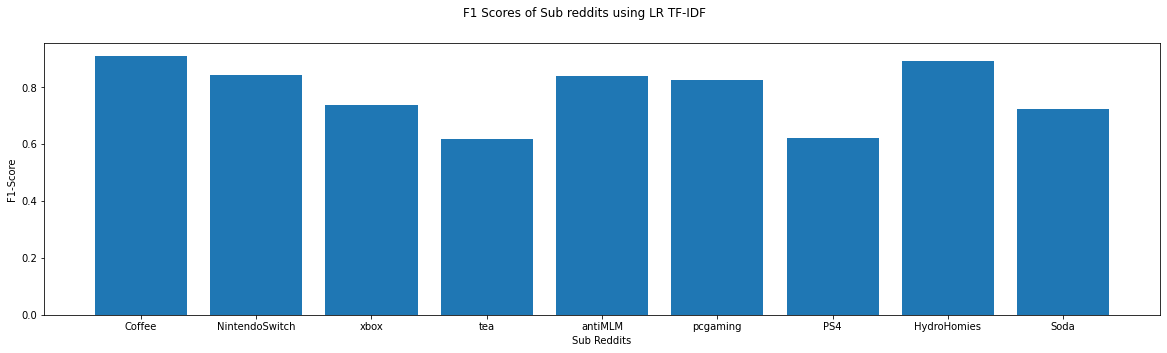

In [ ]:
#Bar graph to represent the F1 scores of the LR-TFIDF classifier
f1_dict={}
for keys in test_labels.unique():
  val = lr_tfidf_eval.get(keys).get('f1-score')
  f1_dict[keys]=val

x_axis = f1_dict.keys()
y_axis = f1_dict.values()

plt.figure(figsize=(20,5))
plt.suptitle('F1 Scores of Sub reddits using LR TF-IDF')
plt.xlabel('Sub Reddits')
plt.ylabel('F1-Score')
plt.bar(x_axis,y_axis)

### Q1c:

Neural Network - MLP(multi layer perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# Using the MLP Classifier to implement the Neural Network
dnn_classifier = MLPClassifier(hidden_layer_sizes = [150]*2,solver='adam')
dnn_classifier.fit(tfidf_train_features, train_labels)
print('accuracy:',dnn_classifier.score(tfidf_test_features,test_labels))

dnn_test_labels = dnn_classifier.predict(tfidf_test_features)

#Capturing the evaluation metrics of the above model
dnn_eval=evaluation_summary("DNN TF-IDF", test_labels, dnn_test_labels,test_labels.unique())
print(pd.DataFrame.from_dict(dnn_eval))

accuracy: 0.7375
              Coffee  NintendoSwitch       xbox        tea    antiMLM  \
precision   0.870370        0.916667   0.782609   0.542373   0.741935   
recall      0.839286        0.868421   0.692308   0.666667   0.793103   
f1-score    0.854545        0.891892   0.734694   0.598131   0.766667   
support    56.000000       38.000000  52.000000  48.000000  29.000000   

            pcgaming        PS4  HydroHomies       Soda  accuracy   macro avg  \
precision   0.857143   0.595238     0.708333   0.690476    0.7375    0.745016   
recall      0.818182   0.531915     0.809524   0.659091    0.7375    0.742055   
f1-score    0.837209   0.561798     0.755556   0.674419    0.7375    0.741657   
support    44.000000  47.000000    42.000000  44.000000    0.7375  400.000000   

           weighted avg  
precision      0.744103  
recall         0.737500  
f1-score       0.738859  
support      400.000000  


Comparing the F1 Scores of the LR-TFIDF model and the DNN Model

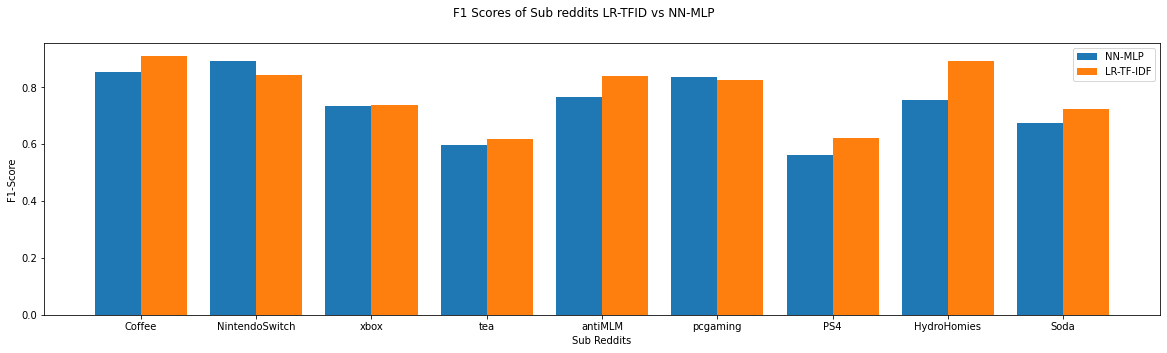

In [ ]:
#Bar graph to show the difference in the prediction rates of the labels using the two models
NN_f1_dict={}
for keys in test_labels.unique():
  val = dnn_eval.get(keys).get('f1-score')
  NN_f1_dict[keys]=val

nn_x_axis = NN_f1_dict.keys()
nn_y_axis = NN_f1_dict.values()

x_axis_len = np.arange(len(NN_f1_dict.keys()))

plt.figure(figsize=(20,5))
plt.suptitle('F1 Scores of Sub reddits LR-TFID vs NN-MLP')
plt.xlabel('Sub Reddits')
plt.ylabel('F1-Score')
plt.bar(x_axis_len -0.2,nn_y_axis,width=0.4,label='NN-MLP')
plt.bar(x_axis_len +0.2,y_axis,width=0.4,label='LR-TF-IDF')
plt.xticks(x_axis_len,test_labels.unique())
plt.legend()
plt.show()

## Q2:

### Q2a:

Parameter tuning of LR TF_IDF Classification model

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

Tuning the classifier

Creating a Pipeline to perform tuning of the classifier using GridSearchCV

In [ ]:
from sklearn.pipeline import Pipeline

#Initialising the Pipeline with tokenizer
prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy)),
              ('logreg', LogisticRegression(max_iter=500))
              ])

In [ ]:
#importing GridSearchCV
from sklearn.model_selection import GridSearchCV

Tuning the Sublinear_tf parameter to find the optimum value for the model

In [ ]:
import sklearn

#creating a parameter dictionary to be passed to the pipeline
params={
   'TF-IDF__sublinear_tf':[True,False],
}

#calling the pipeline inside the GridSearchCV with the params dictionary and scoring as f1_weighted and 7 fold CV
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, scoring='f1_weighted', cv=7)
grid_search.fit(training_data, train_labels)

#Printing the Best score and parameter value 
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.781
Best parameters set:
	TF-IDF__sublinear_tf: True


Reinitialising the pipeline with the Best Sublinear tf value calculated above

In [ ]:
prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy,sublinear_tf=True)),
              ('logreg', LogisticRegression(max_iter=1000))
              ])

In [ ]:
#creating the params dictionary with C values for LR 
params={
   'logreg__C':[0.001,0.01,0.1,1,10,100,1000,10000,100000]
}
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, scoring='f1_weighted', cv=7)
grid_search.fit(training_data, train_labels)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.784
Best parameters set:
	logreg__C: 10


Reinitialising the pipeline with the best C value obtained from above

In [ ]:
prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy,sublinear_tf=True)),
              ('logreg', LogisticRegression(C=10,max_iter=500))
              ])

In [ ]:
#creating params dictionary with max features
params={
   'TF-IDF__max_features':[1000,5000,6000],
}
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, scoring='f1_weighted', cv=7)
grid_search.fit(training_data, train_labels)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.783
Best parameters set:
	TF-IDF__max_features: 5000


Reinitialising pipeline with the best max feature obtained from above

In [ ]:
prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy,sublinear_tf=True,max_features=5000)),
              ('logreg', LogisticRegression(C=10,max_iter=500))
              ])

Checking for other parameters that could provide better optimization

In [ ]:
import numpy as np

In [ ]:
#creating params dictionary with min_df and max_df values
params={
   'TF-IDF__min_df':np.arange(1,5,1),
   'TF-IDF__max_df':np.arange(0.1,1.0,0.1),
}
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, scoring='f1_weighted', cv=7)
grid_search.fit(training_data, train_labels)
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.783
Best parameters set:
	TF-IDF__max_df: 0.30000000000000004
	TF-IDF__min_df: 1


The min_df and max_df do not contribute to signifant change in optimization and hence is not being added to the LR TFIDF model 

Running the above best parametrs for test data to check the best score

Final Pipeline with all the best parameters obtained through GridSearchCV

In [ ]:
prediction_pipeline = Pipeline([
              ('selector', ItemSelector(key='body')),
              ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy,sublinear_tf=True,max_features=5000)),
              ('logreg', LogisticRegression(C=10,max_iter=500))
              ])
prediction_pipeline.fit(training_data,train_labels)

Pipeline(steps=[('selector', ItemSelector(key='body')),
                ('TF-IDF',
                 TfidfVectorizer(max_features=5000, sublinear_tf=True,
                                 tokenizer=<function text_pipeline_spacy at 0x7f7ff006d3b0>)),
                ('logreg', LogisticRegression(C=10, max_iter=500))])

Evaluating the New classifier with the optimized parameters

In [ ]:
# Creating a new classifier with optimised values
predicted_lr = LogisticRegression(C=10,max_iter=500)

#creating new vectorizer with optimised values
predicted_tf_idf = TfidfVectorizer(tokenizer=text_pipeline_spacy,sublinear_tf=True,max_features=5000)

#Fitting the data sets to obtain the features
predicted_train_features=predicted_tf_idf.fit_transform(training_data['body'].tolist())
predict_lr_model = predicted_lr.fit(predicted_train_features,train_labels)
predicted_test_features = predicted_tf_idf.transform(testing_data['body'])

#Running the model for test data and retrieving the classification report
predicted_test_labels = predict_lr_model.predict(predicted_test_features)
predicted_test_eval = evaluation_summary("Predicted Eval", test_labels, predicted_test_labels,test_labels.unique())

print(pd.DataFrame.from_dict(predicted_test_eval))
 

              Coffee  NintendoSwitch       xbox        tea    antiMLM  \
precision   0.962264        0.897436   0.769231   0.540984   0.920000   
recall      0.910714        0.921053   0.769231   0.687500   0.793103   
f1-score    0.935780        0.909091   0.769231   0.605505   0.851852   
support    56.000000       38.000000  52.000000  48.000000  29.000000   

            pcgaming        PS4  HydroHomies       Soda  accuracy   macro avg  \
precision   0.837209   0.609756     0.826087   0.800000    0.7825    0.795885   
recall      0.818182   0.531915     0.904762   0.727273    0.7825    0.784859   
f1-score    0.827586   0.568182     0.863636   0.761905    0.7825    0.788085   
support    44.000000  47.000000    42.000000  44.000000    0.7825  400.000000   

           weighted avg  
precision       0.79007  
recall          0.78250  
f1-score        0.78408  
support       400.00000  


Tabular representation of evaluation metrics for test data

In [ ]:
prediction_test_df=pd.DataFrame.from_dict(predicted_test_eval)[['accuracy','macro avg','weighted avg']][:-1]
prediction_test_df

,accuracy,macro avg,weighted avg
precision,0.7825,0.795885,0.79007
recall,0.7825,0.784859,0.78250
f1-score,0.7825,0.788085,0.78408


### Q2b:

Error Analysis of metrics obtained from the optimised model

Graphical representation of the number of labels that have been predicted incorrectly

Predicted Labels match with actual labels:  313
Predicted labels not match with actual labels:  87


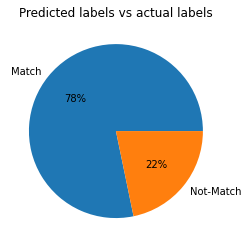

In [ ]:
true_count=0
false_count=0
for i in range(len(test_labels)):
  if test_labels[i]== predicted_test_labels[i]:
    true_count+=1
  else:
    false_count+=1
print('Predicted Labels match with actual labels: ',true_count)
print('Predicted labels not match with actual labels: ',false_count)

value =[true_count,false_count]
labels=['Match','Not-Match']
plt.pie(value,labels=labels,autopct='%1.0f%%')
plt.title('Predicted labels vs actual labels')
plt.show()

Further analysis of the predictions to see why the model have a higher incorrect prediction rate using Eli5

In [ ]:
#installing eli5
#!pip install eli5

In [ ]:
import eli5

#Gathering the top 20 word features and their weightage for each label
eli5.show_weights(prediction_pipeline.steps[2][1], vec=prediction_pipeline.steps[1][1], top=20)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


It can be seen that there are many words that occur in multiple labelswith ahigher weightage thus resulting in mis-classification by the model

## Q3:

### Q3a:

Further optimization of the Model

Checkign the dataframe to see if any other column can be used for classification

In [ ]:
training_data

,title,score,id,author,body
subreddit,,,,,
PS4,Can I get banned for having a game that I didn...,0,queqfu,XC-XERZ,"Long story short, I saw ESO in my library, dow..."
pcgaming,How to get a Kinect sensor to work with a PC?,0,1eujoa,ZachTheKing,I have seen a video online where someone took ...
NintendoSwitch,Switch Only Charges with GoPro Cable,5,m00bx7,BluePenguin2002,"Hi, hope this is the right place/way to post t..."
antiMLM,L’Occitane going down MLM route?,15,q13pvx,100fluffyclouds,After buying a majority share in Limelight/Alc...
HydroHomies,Guys i need your help,2,rxiv2g,Epicskeleton53,Is it ok for me to drink coffee in the morning...
...,...,...,...,...,...
xbox,I’m debating if I should get a PC or Xbox Seri...,2,m6a172,Matt3339,I do have some question as well.\n1. Can the S...
Coffee,Where can I buy several exotic or unique coffees?,10,3yvspn,victorlinguist,I am looking for an online place that will off...
tea,What are some of y'all's favorite non-caffeina...,5,bdlfo5,Bobthebanana73,"Due to medical reasons, I am currently not all..."


Two features to enhance the F1 accuracy:
1. Use the Title from the Reddits Data Frame 
2. n-grams in TF-IDF Vectororizer

### Q3b:

Using Feature Union to utilise title as well as body of the reddit posts to further improve accuracy of the model

In [ ]:
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#creating a prediction pipeline with Feature Union of title and body and TF-IDF vectorizer with n-gram values
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy,sublinear_tf=True,max_features=5000,ngram_range=(1,3))),
              ])),
            ('title', Pipeline([
              ('selector', ItemSelector(key='title')),
              ('TF-IDF', TfidfVectorizer(tokenizer=text_pipeline_spacy,sublinear_tf=True,max_features=5000,ngram_range=(1,3))),
              ])),
        ])
        )
    ])

Fitting the data sets to the prediction pipeline created

In [ ]:
enhanced_train_features = prediction_pipeline.fit_transform(training_data)
enhanced_validation_features = prediction_pipeline.transform(validating_data)
enhanced_test_features = prediction_pipeline.transform(testing_data)

In [ ]:
#LR Model with the optmised values
lr_model = LogisticRegression(C=10,max_iter=500)

In [ ]:
#Predicting the labels for data sets
enhanced_lr_model = lr_model.fit(enhanced_train_features,train_labels)
enhanced_validation_labels = lr_model.predict(enhanced_validation_features)
enhanced_test_labels = lr_model.predict(enhanced_test_features)

In [ ]:
#calculating the evaluation metrics for the enhanced model
enhanced_test_eval = evaluation_summary("Enhanced Eval", test_labels, enhanced_test_labels,test_labels.unique())
print(pd.DataFrame.from_dict(enhanced_test_eval))

              Coffee  NintendoSwitch       xbox        tea    antiMLM  \
precision   1.000000        0.918919   0.762712   0.641509   0.848485   
recall      0.928571        0.894737   0.865385   0.708333   0.965517   
f1-score    0.962963        0.906667   0.810811   0.673267   0.903226   
support    56.000000       38.000000  52.000000  48.000000  29.000000   

            pcgaming        PS4  HydroHomies       Soda  accuracy   macro avg  \
precision   0.888889   0.707317     0.975000   0.875000      0.84    0.846426   
recall      0.909091   0.617021     0.928571   0.795455      0.84    0.845854   
f1-score    0.898876   0.659091     0.951220   0.833333      0.84    0.844384   
support    44.000000  47.000000    42.000000  44.000000      0.84  400.000000   

           weighted avg  
precision      0.844459  
recall         0.840000  
f1-score       0.840494  
support      400.000000  


Graphical representation of the F1 Scores of the Enhanced LR-TFIDF model

<BarContainer object of 9 artists>

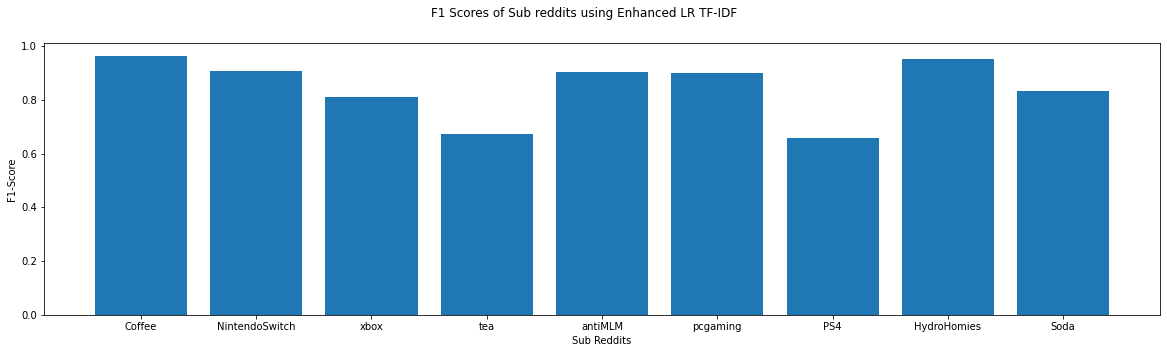

In [ ]:
enhanced_f1_dict={}
for keys in test_labels.unique():
  val = enhanced_test_eval.get(keys).get('f1-score')
  enhanced_f1_dict[keys]=val

x_axis = enhanced_f1_dict.keys()
y_axis = enhanced_f1_dict.values()

plt.figure(figsize=(20,5))
plt.suptitle('F1 Scores of Sub reddits using Enhanced LR TF-IDF')
plt.xlabel('Sub Reddits')
plt.ylabel('F1-Score')
plt.bar(x_axis,y_axis)

### Q3c:

Further analysis of the evaluation metrics of the enhanced LR-TFIDF model

In [ ]:
enhanced_test_eval=pd.DataFrame.from_dict(enhanced_test_eval)[['accuracy','macro avg','weighted avg']][:-1]
enhanced_test_eval

,accuracy,macro avg,weighted avg
precision,0.84,0.846426,0.844459
recall,0.84,0.845854,0.840000
f1-score,0.84,0.844384,0.840494


Graphical representation of the incorrect predictions by the model

Predicted Labels match with actual labels:  336
Predicted labels not match with actual labels:  64


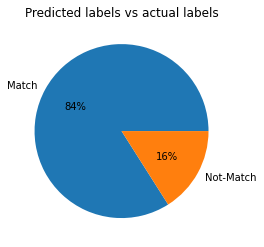

In [ ]:
true_count=0
false_count=0
for i in range(len(test_labels)):
  if test_labels[i]== enhanced_test_labels[i]:
    true_count+=1
  else:
    false_count+=1
print('Predicted Labels match with actual labels: ',true_count)
print('Predicted labels not match with actual labels: ',false_count)

value =[true_count,false_count]
labels=['Match','Not-Match']
plt.pie(value,labels=labels,autopct='%1.0f%%')
plt.title('Predicted labels vs actual labels')
plt.show()

It can be seen that there is a significant decrease in the inccorect predictions by the model after introducing the Title and N-grams

Confusion Matrix of the Enhanced model

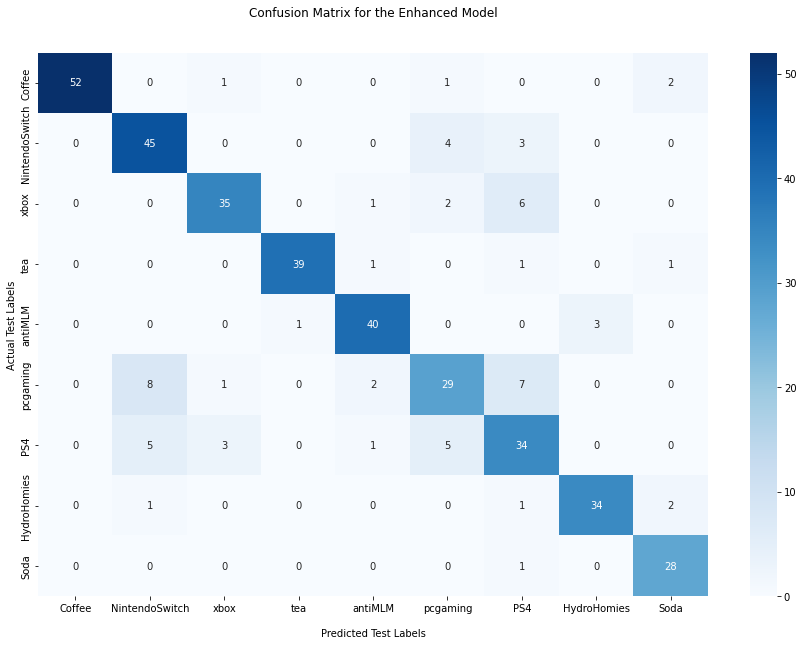

In [ ]:
import seaborn as sns
enhanced_confusion_matrix=confusion_matrix(test_labels, enhanced_test_labels,labels=test_labels.unique())

plt.figure(figsize=(15,10))
ax = sns.heatmap(enhanced_confusion_matrix, annot=True, cmap='Blues')
ax.set_title('Confusion Matrix for the Enhanced Model\n\n');
ax.set_xlabel('\nPredicted Test Labels',fontsize=10)
ax.set_ylabel('Actual Test Labels',fontsize=10);
ax.xaxis.set_ticklabels(test_labels.unique())
ax.yaxis.set_ticklabels(test_labels.unique())
plt.show()


Through the confusion matrix it is clear that certain words that occur in multiple labels with higher weightage do cause the classifier to predict the labels inaccurately, but this can be optimised with the usuage of other columns like 'Score' and introducing word embeddings as well